In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc

In [29]:
fontsize = 12
supTitleSize = 16

FigSizeX = 5
FigSizeY = 5
dpi = 500

rename_dict = {'Valid' : 'Valid Tree Miner', 'Valid (BFS)' : 'Valid Tree Miner', 'Blanket' : 'Blanket Miner', 'NoPruning' : 'FREQT', 'Asai' : 'FREQT (Pruning)'}

figure_dir = 'Figures\\'

output_path_performance = figure_dir + 'Performance\\'
output_path_memory = figure_dir + 'Memory\\'
output_path_patterns = figure_dir + 'Patterns\\'

data_path = 'Eval-Runs\\'

In [30]:
def export_plot(plot_name, path): 
    #plt.savefig(path + '\\svg\\' + plot_name + '.svg', dpi=dpi, bbox_inches='tight')
    #plt.savefig(path + '\\png\\' + plot_name + '.png', dpi=dpi, bbox_inches='tight')
    plt.savefig(path + '\\pdf\\' + plot_name + '.pdf', dpi=dpi, bbox_inches='tight')
    #plt.close()

## Runtime Plots

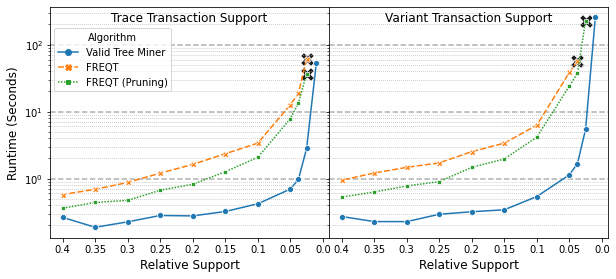

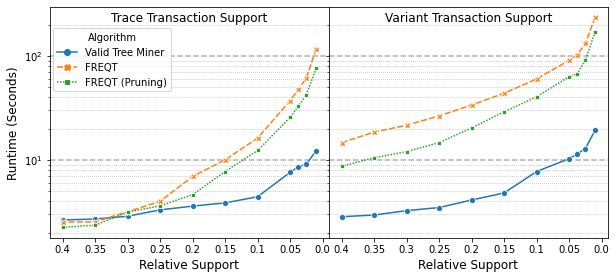

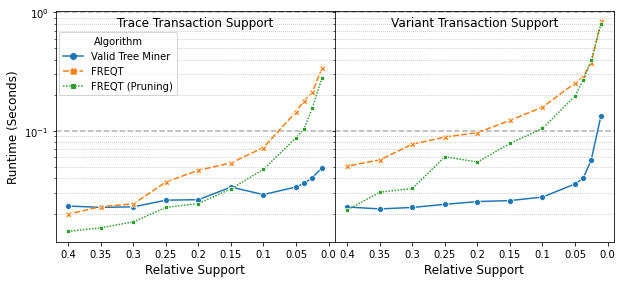

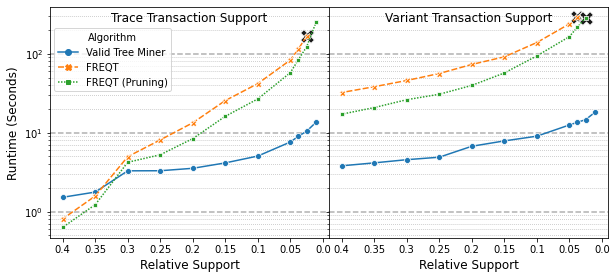

In [32]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'NoPruning', 'Asai']

performance_cols = ['rTime']
yAxisTitle = ['Runtime (Seconds)']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]

for file in files: 
    
    fig, axes = plt.subplots(1, 2, figsize = (2*FigSizeX, FigSizeY- .75), sharey = True)
    
    for t, ax in zip(['_TraceTransaction', '_VariantTransaction'], axes): 
    
        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)
        k = max(df['k_max'].unique())

        df_k = df[df['k_max'] == k].copy()

        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)

            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])

            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)

            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)

            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutNoPruning']):
                index = df_k[~df_k['bailOutNoPruning']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'NoPruning', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']):
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)

            ax.legend(title = 'Algorithm', markerfirst=True, loc = (.0125, .635))           
            ax.invert_xaxis()
            ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
            ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
            
            ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
            ticks_loc = ax.get_xticks().tolist()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
            
    new_title = 'Algorithm'
    ax.set_yscale('log')
    (ax1, ax2) = axes

    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Transaction Support', y=1.0, pad=-15)
    p.legend_.set_title(new_title)
    plt.subplots_adjust(wspace = 0, hspace=0)
    
    ax2.get_legend().remove()
    
    export_plot(file + '_Comparsion_Runtime_Strategy_Trace_vs_Variant', output_path_performance)

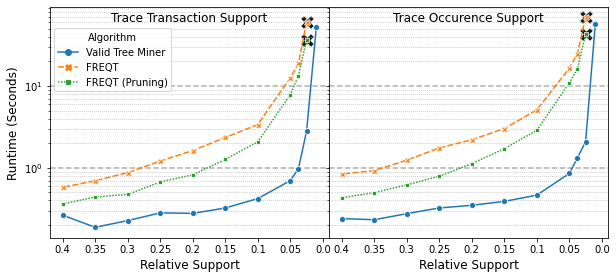

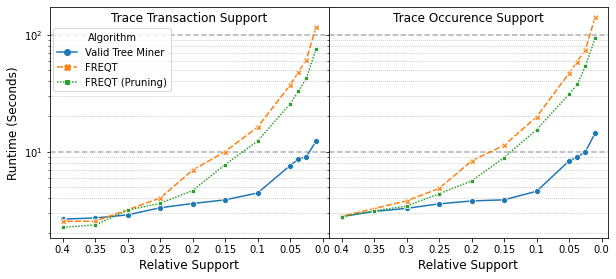

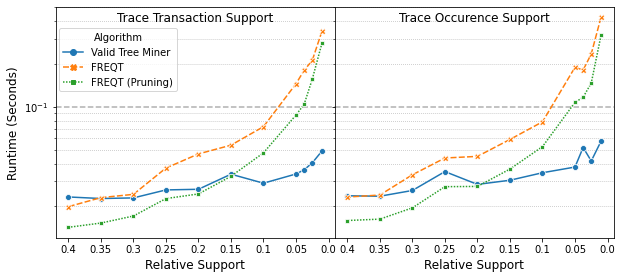

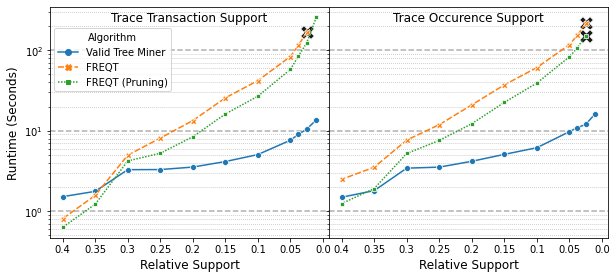

In [33]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'NoPruning', 'Asai']

performance_cols = ['rTime']
yAxisTitle = ['Runtime (Seconds)']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]

for file in files: 
    
    fig, axes = plt.subplots(1, 2, figsize = (2*FigSizeX, FigSizeY- .75), sharey = True)
    
    for t, ax in zip(['_TraceTransaction', '_TraceOccurence'], axes): 
    
        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)
        k = max(df['k_max'].unique())

        df_k = df[df['k_max'] == k].copy()

        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)

            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])

            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)
            
            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)


            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutNoPruning']):
                index = df_k[~df_k['bailOutNoPruning']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'NoPruning', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']):
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)

            ax.legend(title = 'Algorithm', markerfirst=True, loc = (.0125, .635))           
            ax.invert_xaxis()
            ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
            ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
            
            ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
            ticks_loc = ax.get_xticks().tolist()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
            
    new_title = 'Algorithm'
    ax.set_yscale('log')
    (ax1, ax2) = axes

    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Trace Occurence Support', y=1.0, pad=-15)
    p.legend_.set_title(new_title)
    plt.subplots_adjust(wspace = 0, hspace=0)
    
    ax2.get_legend().remove()
    
    export_plot(file + '_Comparsion_Runtime_Strategy_Transactions_vs_Occurences_Trace', output_path_performance)

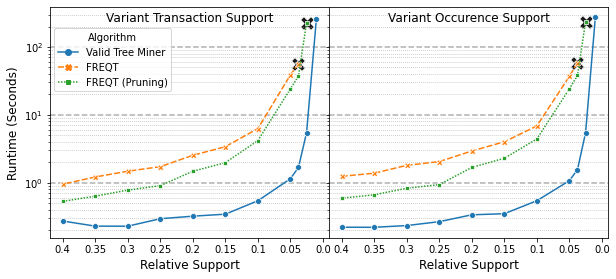

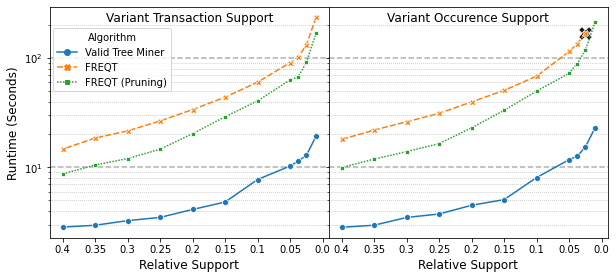

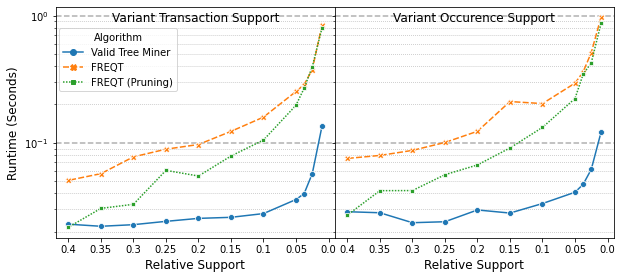

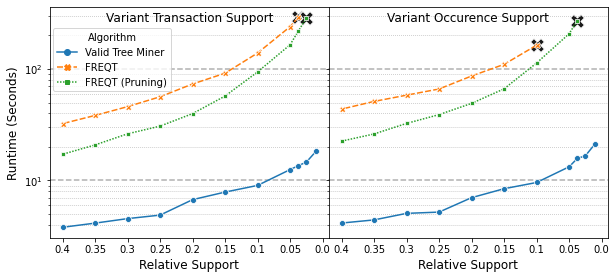

In [34]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'NoPruning', 'Asai']

performance_cols = ['rTime']
yAxisTitle = ['Runtime (Seconds)']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]
for file in files: 
    
    fig, axes = plt.subplots(1, 2, figsize = (2*FigSizeX, FigSizeY- .75), sharey = True)
    
    for t, ax in zip(['_VariantTransaction', '_VariantOccurence'], axes): 
    
        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)
        k = max(df['k_max'].unique())

        df_k = df[df['k_max'] == k].copy()

        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)


            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])

            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)

            
            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)


            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutNoPruning']):
                index = df_k[~df_k['bailOutNoPruning']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'NoPruning', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']):
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)
  
            ax.legend(title = 'Algorithm', markerfirst=True, loc = (.0125, .635))           
            ax.invert_xaxis()
            ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
            ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
            
            ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
            ticks_loc = ax.get_xticks().tolist()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            
            ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
            
    new_title = 'Algorithm'
    ax.set_yscale('log')
    (ax1, ax2) = axes

    ax1.set_title('Variant Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Occurence Support', y=1.0, pad=-15)
    p.legend_.set_title(new_title)
    plt.subplots_adjust(wspace = 0, hspace=0)
    
    ax2.get_legend().remove()
    
    export_plot(file + '_Comparsion_Runtime_Strategy_Transactions_vs_Occurences_Variants', output_path_performance)

## Number of Candidates

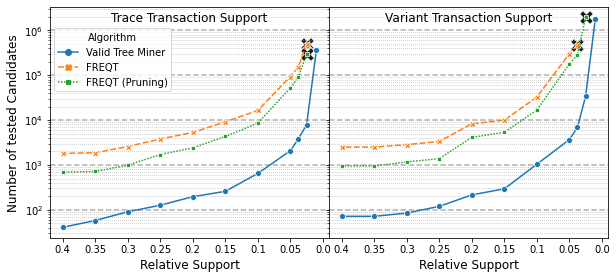

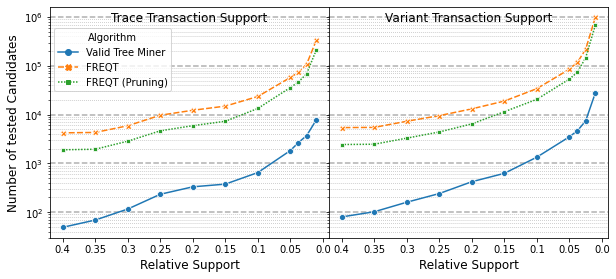

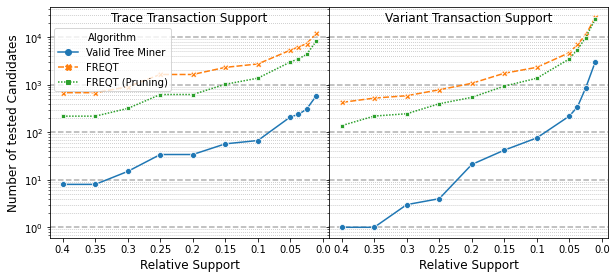

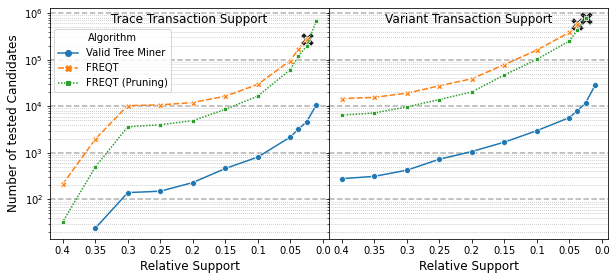

In [35]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'NoPruning', 'Asai']

performance_cols = ['nCandidates']
yAxisTitle = ['Number of tested Candidates']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]

for file in files: 
    
    fig, axes = plt.subplots(1, 2, figsize = (2*FigSizeX, FigSizeY- .75), sharey = True)
    
    for t, ax in zip(['_TraceTransaction', '_VariantTransaction'], axes): 
    
        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)
        k = max(df['k_max'].unique())

        df_k = df[df['k_max'] == k].copy()

        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)


            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])

            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)

            
            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)


            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutNoPruning']):
                index = df_k[~df_k['bailOutNoPruning']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'NoPruning', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']):
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)

            ax.legend(title = 'Algorithm', markerfirst=True, loc = (.0125, .635))           
            ax.invert_xaxis()
            ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
            ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
            
            ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
            ticks_loc = ax.get_xticks().tolist()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
            
    new_title = 'Algorithm'
    ax.set_yscale('log')
    (ax1, ax2) = axes

    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Transaction Support', y=1.0, pad=-15)
    p.legend_.set_title(new_title)
    plt.subplots_adjust(wspace = 0, hspace=0)
    
    ax2.get_legend().remove()
    
    export_plot(file + '_Comparsion_Candidates_Strategy_Trace_vs_Variant', output_path_performance)

## Memory Usage

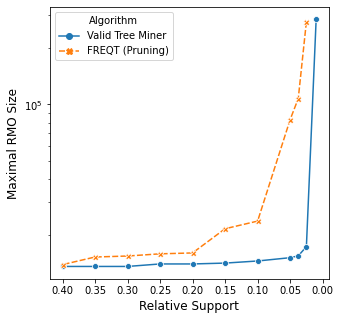

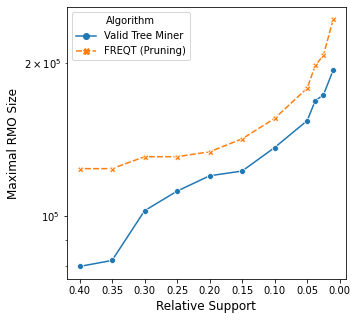

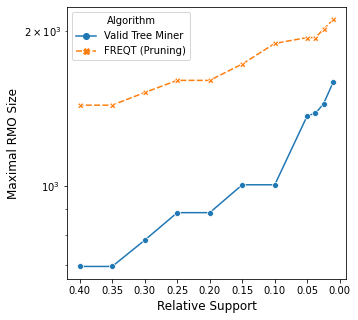

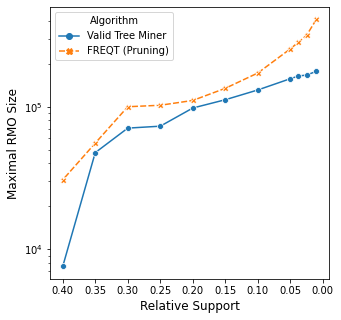

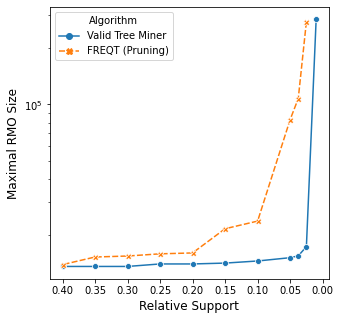

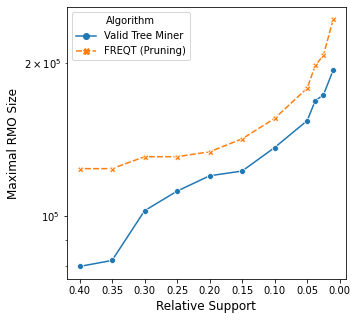

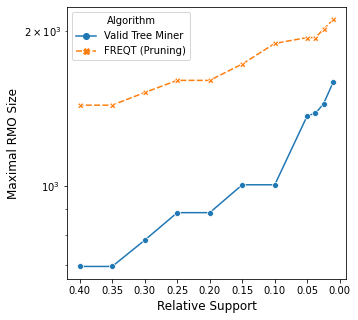

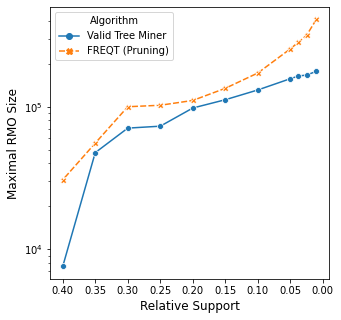

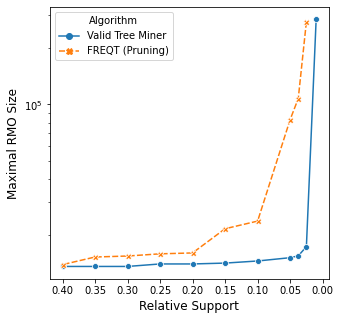

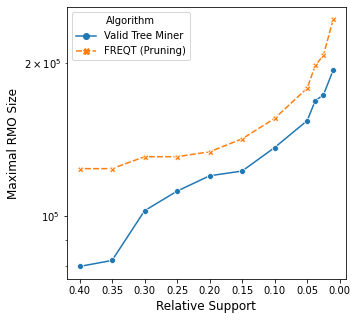

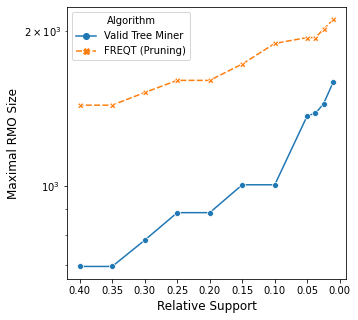

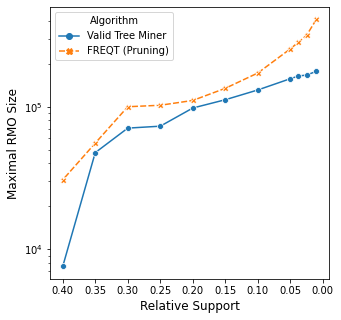

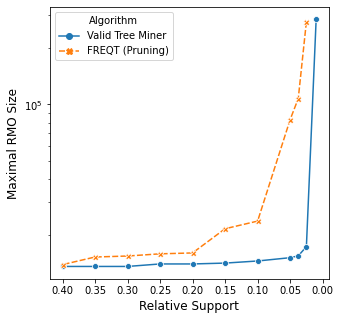

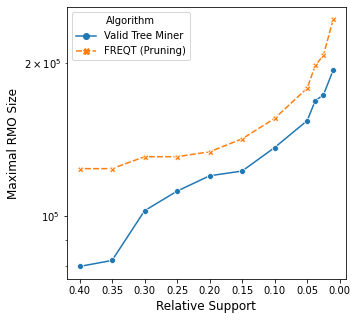

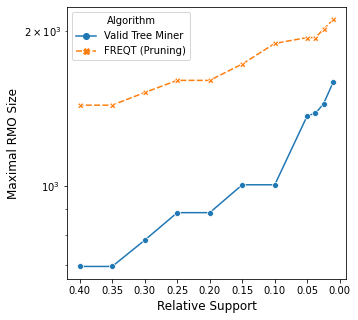

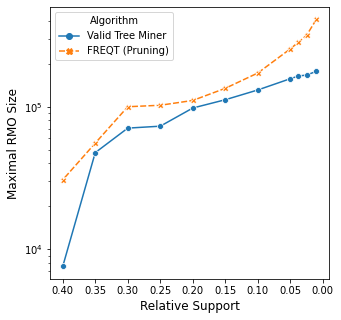

In [36]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'Asai']

performance_cols = [ 'maxOccurenceList']
yAxisTitle = ['Maximal RMO Size']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]
for t in ['_TraceTransaction', '_VariantTransaction', '_TraceOccurence', '_VariantOccurence']: 

    for file in files: 

        df = pd.read_csv(data_path + file + '_TraceTransaction_Pattern_Mining_Memory.csv', index_col = 0)
        k = max(df['k_max'].unique())

        df_k = df[df['k_max'] == k].copy()
        fig, (ax) = plt.subplots(1, 1, figsize = (FigSizeX * len(performance_cols), FigSizeY))

        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)

            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])

            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)

            ax.set_yscale('log')
            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)


            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']):
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)
                
            ax.invert_xaxis()
            ax.legend(title = 'Algorithm', markerfirst=True)

        new_title = 'Algorithm'
        p.legend_.set_title(new_title)

        export_plot(file.split('_Trace')[0] + t + '_Memory_Max_Occurence', output_path_memory)

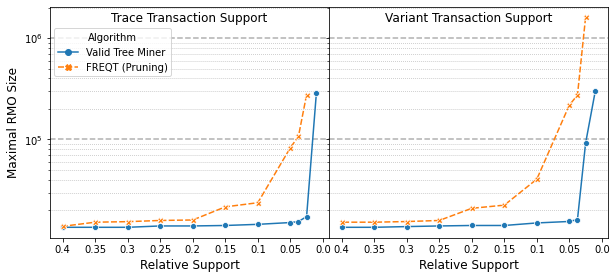

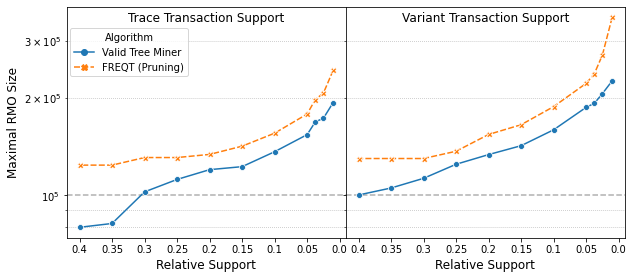

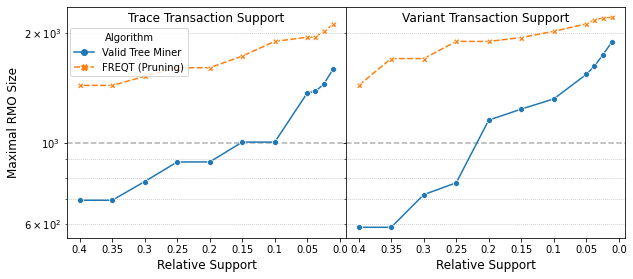

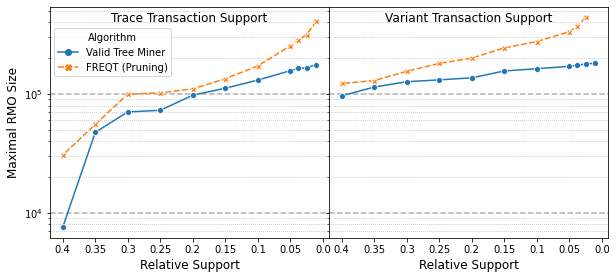

In [37]:
files = ['Sepsis Cases - Event Log', "BPI Challenge 2017", "BPI_CH_2020_PrepaidTravelCost", 'BPI_Challenge_2012']
algNames = ['Valid (BFS)', 'Asai']

performance_cols = [ 'maxOccurenceList']
yAxisTitle = ['Maximal RMO Size']

full_columns = [(col, [col + alg for alg in algNames]) for col in performance_cols ]

for file in files: 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2 * FigSizeX * len(performance_cols), FigSizeY - .75), sharey = True)
    for t, ax in zip(['_TraceTransaction', '_VariantTransaction'], [ax1, ax2]): 
        
        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Memory.csv', index_col = 0)
        k = max(df['k_max'].unique())
        df_k = df[df['k_max'] == k]
        
        for yAxis, (col_name, columns) in zip(yAxisTitle, full_columns):
            df_nested = df[['rel_sup'] + columns].melt(id_vars = 'rel_sup')
            df_nested['variable'] = df_nested.apply(lambda x : x.variable[len(col_name):], axis = 1)

            df_nested = df_nested[df_nested.value > 0]
            df_nested['variable'] = df_nested['variable'].apply(lambda x : rename_dict[x])
            
            p = sns.lineplot(data = df_nested , x= 'rel_sup', y='value', style = 'variable', hue = 'variable', markers=True, ax = ax)
            
            p.set_ylabel(yAxis, fontsize = fontsize)
            p.set_xlabel("Relative Support", fontsize = fontsize)


            if any(df_k['bailOutValid (BFS)']):
                index = df_k[~df_k['bailOutValid (BFS)']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y= col_name + 'Valid', s=200, color=".1", marker="X", ax = ax)

            if any(df_k['bailOutAsai']) and not (file == 'BPI_Challenge_2012'):  
                index = df_k[~df_k['bailOutAsai']]['rel_sup'].idxmin()
                sns.scatterplot(data=df_k.loc[[index], :], x= 'rel_sup', y=col_name + 'Asai', s=200, color=".1", marker="X", ax = ax)

            ax.legend(title = 'Algorithm', markerfirst=True, loc = (.0125, .7))           
            ax.invert_xaxis()
            ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
            ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
            
            ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
            ticks_loc = ax.get_xticks().tolist()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
            
        new_title = 'Algorithm'
        p.legend_.set_title(new_title)

    ax1.set_yscale('log')
    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Transaction Support', y=1.0, pad=-15)
    plt.subplots_adjust(wspace = 0, hspace = 0) 
    ax2.get_legend().remove()
    export_plot(file.split('_Trace')[0] + t + '_Memory_Max_Occurence_Trace_Vs_Variant', output_path_memory)

## Number of Frequnet Infix Subtrees

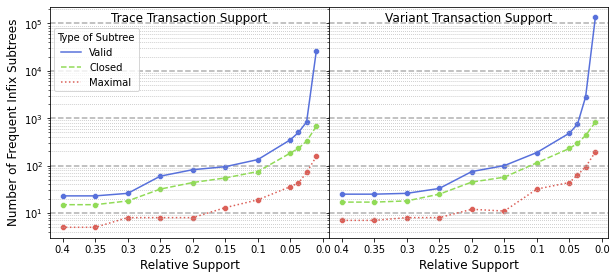

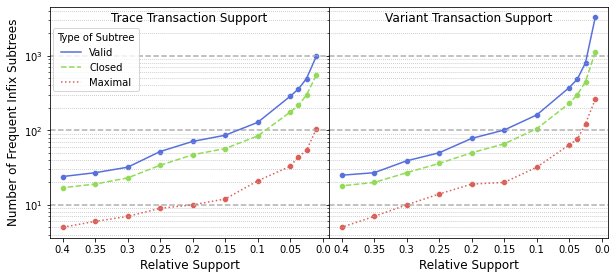

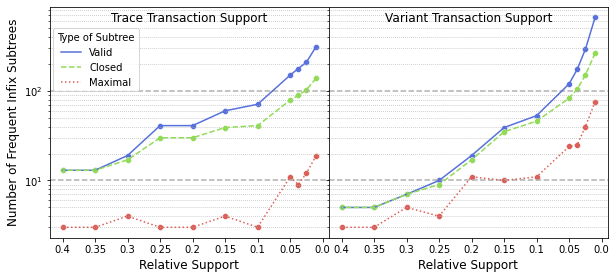

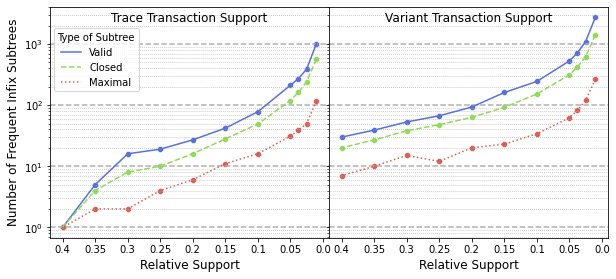

In [38]:
for file in ['Sepsis Cases - Event Log', 'BPI Challenge 2017', 'BPI_CH_2020_PrepaidTravelCost', 'BPI_Challenge_2012']:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2 * FigSizeX, FigSizeY - .75), sharey = True)
    
    for t, ax in zip(['_TraceTransaction', '_VariantTransaction'], [ax1, ax2]): 

        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)

        df_k = df.copy()

        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)',  label = 'Valid', ax = ax, linestyle = 'solid', color = sns.color_palette("hls", 8)[5])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)',  label = 'Closed', ax = ax, linestyle = 'dashed', color = sns.color_palette("hls", 8)[2])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)',  label = 'Maximal', ax = ax, linestyle = 'dotted', color = sns.color_palette("hls", 8)[0] )

        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[5])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[2])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[0])

        p.set_ylabel("Number of Frequent Infix Subtrees", fontsize = fontsize)
        p.set_xlabel("Relative Support", fontsize = fontsize)

        ax.legend(title = 'Type of Subtree', markerfirst=True, loc = (.0125, .635))
        ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
        ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
        ax.invert_xaxis()

        ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
       
    ax1.set_yscale('log')
    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Transaction Support', y=1.0, pad=-15)
    plt.subplots_adjust(wspace = 0, hspace = 0) 
    ax2.get_legend().remove()
    
    export_plot(file.split('_Trace')[0] + '_Proportional_Patters_Traces_vs_Variants', output_path_patterns)

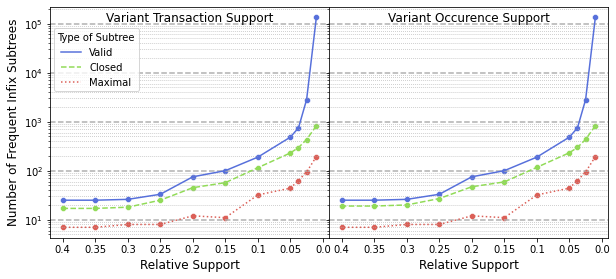

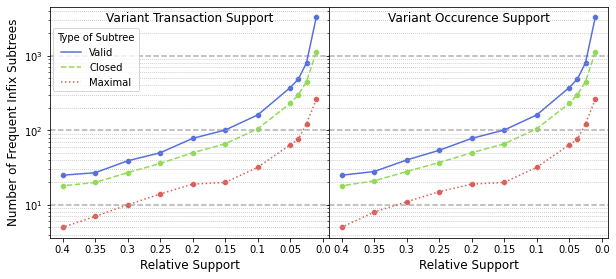

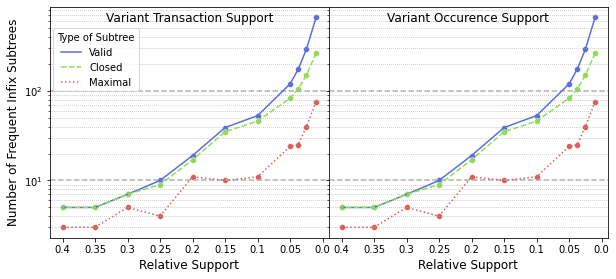

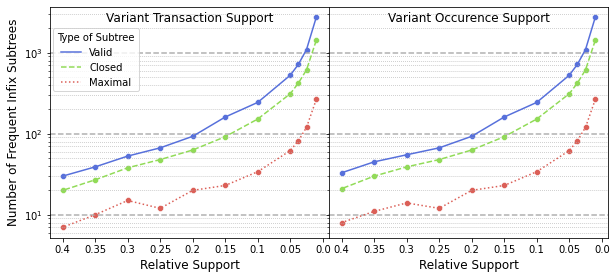

In [39]:
for file in ['Sepsis Cases - Event Log', 'BPI Challenge 2017', 'BPI_CH_2020_PrepaidTravelCost', 'BPI_Challenge_2012']:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2 * FigSizeX, FigSizeY- .75), sharey = True)
    
    for t, ax in zip(['_VariantTransaction', '_VariantOccurence'], [ax1, ax2]): 

        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)

        df_k = df.copy()

        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)',  label = 'Valid', ax = ax, linestyle = 'solid', color = sns.color_palette("hls", 8)[5])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)',  label = 'Closed', ax = ax, linestyle = 'dashed', color = sns.color_palette("hls", 8)[2])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)',  label = 'Maximal', ax = ax, linestyle = 'dotted', color = sns.color_palette("hls", 8)[0] )

        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[5])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[2])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[0])

        p.set_ylabel("Number of Frequent Infix Subtrees", fontsize = fontsize)
        p.set_xlabel("Relative Support", fontsize = fontsize)
        
        ax.invert_xaxis()
        
        ax.legend(title = 'Type of Subtree', markerfirst=True, loc = (.0125, .635))
        ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
        ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
        
        ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
        
        
       
    ax1.set_yscale('log')
    ax1.set_title('Variant Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Variant Occurence Support', y=1.0, pad=-15)
    plt.subplots_adjust(wspace = 0, hspace = 0) 
    ax2.get_legend().remove()
    
    export_plot(file.split('_Trace')[0] + '_Proportional_Patters_Transaction_vs_Occurence_Variants', output_path_patterns)

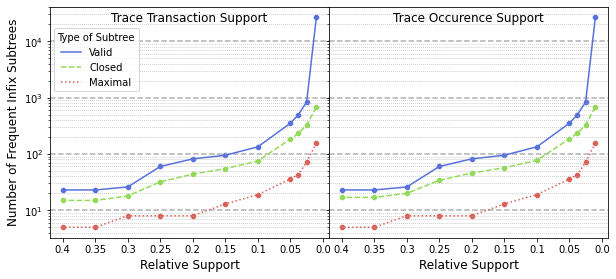

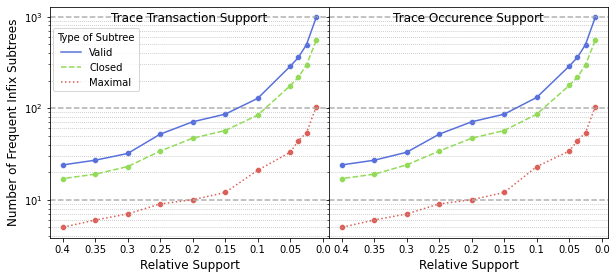

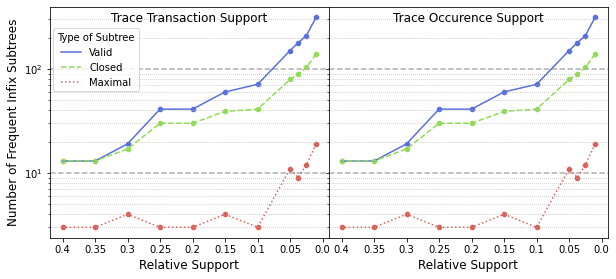

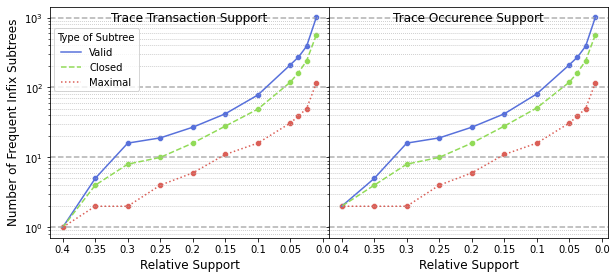

In [40]:
for file in ['Sepsis Cases - Event Log', 'BPI Challenge 2017', 'BPI_CH_2020_PrepaidTravelCost', 'BPI_Challenge_2012']:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2 * FigSizeX, FigSizeY - .75), sharey = True)
    
    for t, ax in zip(['_TraceTransaction', '_TraceOccurence'], [ax1, ax2]): 

        df = pd.read_csv(data_path + file + t + '_Pattern_Mining_Performance.csv', index_col = 0)

        df_k = df.copy()

        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)',  label = 'Valid', ax = ax, linestyle = 'solid', color = sns.color_palette("hls", 8)[5])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)',  label = 'Closed', ax = ax, linestyle = 'dashed', color = sns.color_palette("hls", 8)[2])
        p = sns.lineplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)',  label = 'Maximal', ax = ax, linestyle = 'dotted', color = sns.color_palette("hls", 8)[0] )

        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nValidValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[5])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nClosedValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[2])
        p = sns.scatterplot(data = df_k, x= 'rel_sup', y='nMaxValid (BFS)', ax = ax, color = sns.color_palette("hls", 8)[0])

        p.set_ylabel("Number of Frequent Infix Subtrees", fontsize = fontsize)
        p.set_xlabel("Relative Support", fontsize = fontsize)

        ax.legend(title = 'Type of Subtree', markerfirst=True, loc = (.0125, .635))
        ax.grid(which ='major', axis = 'y', linestyle ='--', lw = 1.5)
        ax.grid(which ='minor', axis = 'y', linestyle =':', lw = 0.75)
        ax.invert_xaxis()

        ax.xaxis.set_major_locator(mticker.MaxNLocator(9))
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels([-0.1, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
        
    ax1.set_yscale('log')
    ax1.set_title('Trace Transaction Support', y=1.0, pad=-15)
    ax2.set_title('Trace Occurence Support', y=1.0, pad=-15)
    plt.subplots_adjust(wspace = 0, hspace = 0) 
    ax2.get_legend().remove()
    
    export_plot(file.split('_Trace')[0] + '_Proportional_Patters_Transaction_vs_Occurence_Traces', output_path_patterns)